# NBA Player Stats - Modeling

## Capstone Project Two

Build different models to cluster NBA players into different groups that go beyond the traditional positional groupings of (PG, SG, SF, PF, C). 

## Imports

In [1]:
# Import relevant libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, v_measure_score, silhouette_samples

# Suppress future warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Prepare the notebook for matplotlib and other libraries- show plots inline
%matplotlib inline

sns.set_style("whitegrid")

## Loading Data

In [2]:
# Load data
nba_df = pd.read_csv('data/nba_stats_cleaned.csv',  index_col=0)

## Explore Data

In [3]:
# View df appearance
nba_df.head(10)

,Player,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,73,23.6,3.6,8.3,0.439,0.8,2.1,0.359,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,76,26.3,2.8,5.1,0.547,0.0,0.0,0.000,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,32,11.3,1.7,4.1,0.402,0.2,1.5,0.125,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,47,22.3,5.4,9.7,0.550,0.3,1.0,0.304,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
5,Nickeil Alexander-Walker,SG,65,22.6,3.9,10.5,0.372,1.6,5.2,0.311,...,0.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6
8,Grayson Allen,SG,66,27.3,3.9,8.6,0.448,2.4,5.9,0.409,...,0.865,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1
9,Jarrett Allen,C,56,32.3,6.6,9.7,0.677,0.0,0.2,0.100,...,0.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1
10,Jose Alvarado,PG,54,15.4,2.4,5.4,0.446,0.6,2.0,0.291,...,0.679,0.5,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1
11,Justin Anderson,SF,16,19.8,2.3,5.9,0.379,0.9,3.7,0.254,...,0.789,0.3,2.6,2.9,2.1,0.5,0.4,0.5,1.4,6.4


In [4]:
# Set indexes to "Player"
nba_df = nba_df.set_index('Player')

# Save "Player" column names
nba_player = nba_df.index

# View new df
nba_df.head()

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,C,73,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
Steven Adams,C,76,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
Bam Adebayo,C,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
Santi Aldama,PF,32,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
LaMarcus Aldridge,C,47,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [5]:
# Check column names
nba_df.columns

Index(['Pos', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [6]:
# Feature Selection
features = ['G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS']

In [7]:
# Set feature and label variables
X = nba_df[features]
labels = nba_df.Pos

## Scaling Data

In [8]:
# Make Scaler object
scaler = StandardScaler()

# Fit scaler and apply to data
X = scaler.fit_transform(X)

In [9]:
#Re-introduce column names back into new scaled df
X = pd.DataFrame(X, columns=features)

In [10]:
# View new scaled df
X.head()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.068329,0.313608,0.068946,0.165488,-0.203596,-0.277375,-0.382884,0.427411,0.271534,0.467934,...,-0.933386,1.471679,0.880299,1.137839,-0.535171,-0.410317,0.489769,0.083711,0.498505,-0.040755
1,1.215793,0.619889,-0.286904,-0.506714,1.059811,-1.196596,-1.299084,-2.745210,0.216701,0.138993,...,-1.270339,4.989206,1.382880,2.632635,0.701410,0.623228,1.020397,0.449795,0.358002,-0.392646
2,0.232698,1.334543,1.714754,1.152783,1.176793,-1.196596,-1.255455,-2.745210,2.684191,2.501388,...,0.090433,2.012837,2.611413,2.675343,0.701410,1.915159,1.020397,1.792103,1.903536,1.558747
3,-0.947015,-1.081669,-0.776199,-0.716777,-0.636429,-0.966791,-0.644655,-1.640537,-0.496130,-0.578697,...,-0.738990,0.118784,-0.683287,-0.485083,-0.750228,-1.185476,-0.306172,-0.770485,-0.906526,-0.840506
4,-0.209694,0.166140,0.869609,0.459576,1.094906,-0.851888,-0.862798,-0.058645,1.477862,1.275335,...,0.868017,0.930521,0.545245,0.710754,-0.642699,-0.927090,1.551024,-0.282373,-0.063507,0.567055


## Modeling

### Principal Component Analysis (PCA)

In [11]:
# Dimension Reduction for more efficient analysis
variance_list = []

for n_components in range(2, 25):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(X)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, variance))

For n_components = 2, explained variance ratio is 0.6858466171911651
For n_components = 3, explained variance ratio is 0.7614908259239215
For n_components = 4, explained variance ratio is 0.8072957711614266
For n_components = 5, explained variance ratio is 0.8400683661203946
For n_components = 6, explained variance ratio is 0.8718288258410456
For n_components = 7, explained variance ratio is 0.8969794379515902
For n_components = 8, explained variance ratio is 0.9198429020677616
For n_components = 9, explained variance ratio is 0.9359345432506359
For n_components = 10, explained variance ratio is 0.9501945647932677
For n_components = 11, explained variance ratio is 0.9636757868643541
For n_components = 12, explained variance ratio is 0.9743909285555331
For n_components = 13, explained variance ratio is 0.9846749657139924
For n_components = 14, explained variance ratio is 0.9913002758251953
For n_components = 15, explained variance ratio is 0.9954123182292081
For n_components = 16, expla

Text(0.5, 0.98, 'Explained Variance Per Component #')

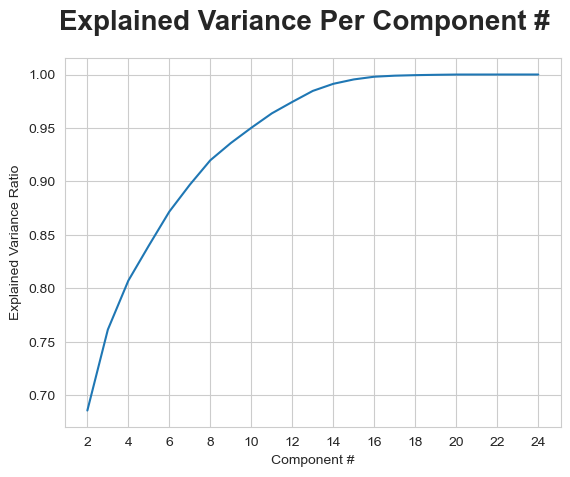

In [12]:
# plot the components
pca_fig, ax = plt.subplots()

ax.plot(range(2, 25), variance_list)

ax.set_xlabel('Component #')
ax.set_ylabel('Explained Variance Ratio')

ax.set_xticks(np.arange(2, 25, 2.0))

pca_fig.suptitle("Explained Variance Per Component #", weight = 'bold', size = 20)

The first 10 components explain for about ~95% of the variance of the data. 

In [13]:
# Using 10 component, we will create new PCA object
pca = PCA(n_components = 10)

# Fit PCA and apply to data
nba_pca = pca.fit_transform(X)

In [14]:
components = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

# Create new df with components
pca_df = pd.DataFrame(data = nba_pca, columns = components)

In [15]:
# Add player names to visualize with components
pca_df['Player'] = nba_player
pca_df = pca_df.set_index('Player')
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Player,,,,,,,,,,
Precious Achiuwa,0.786201,1.103935,0.695150,-1.628810,1.310344,0.309444,0.640343,-1.005798,-0.054870,-0.553709
Steven Adams,1.746808,5.104019,2.106357,-2.386671,-0.709976,-0.859366,-0.031805,-1.895424,-1.526435,-0.360329
Bam Adebayo,6.762261,3.771465,3.368587,0.188406,-1.494466,0.049672,-0.028240,-0.362089,0.027136,-0.404439
Santi Aldama,-3.292562,0.595180,1.628942,0.307131,-0.268122,0.166262,-1.007701,-0.573947,0.055615,-0.065031
LaMarcus Aldridge,1.546901,2.396895,0.281960,0.714185,0.226513,1.851230,0.204400,0.374865,0.154035,0.021698


### K-Means Clustering

#### Choosing Optimal K

Text(0, 0.5, 'Sum of Squares')

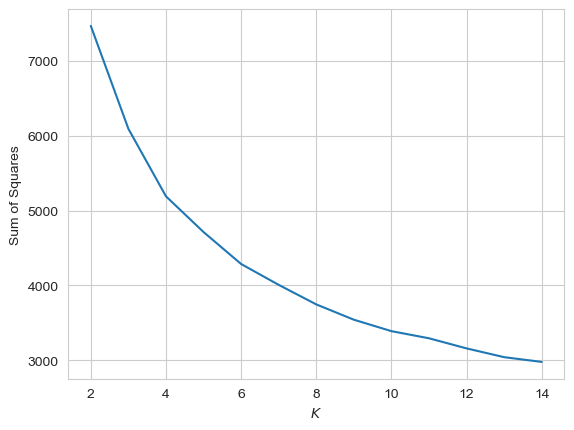

In [16]:
ss = []
assignments = {}

X = pca_df.to_numpy()

Krange = list(range(2, 15))

for K in Krange:
    model = KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    assignments[str(K)] = assigned_cluster
    
plt.plot(Krange, ss)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")

6


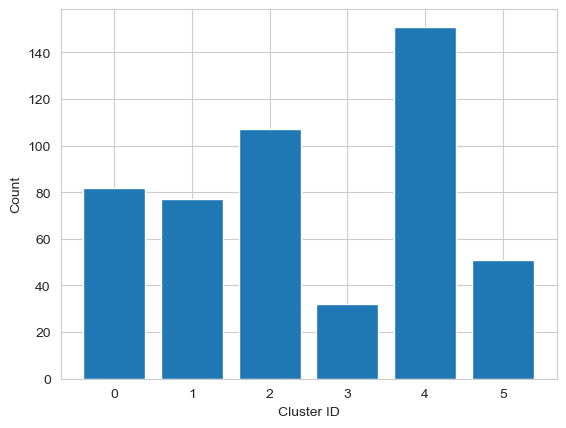

In [17]:
best_K = 6
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
print(len(counts))

# Plot distribution with best K
_ = plt.bar(range(best_K), counts, align='center')
_ = plt.xlabel("Cluster ID")
_ = plt.ylabel("Count")
_ = plt.xticks(range(best_K))

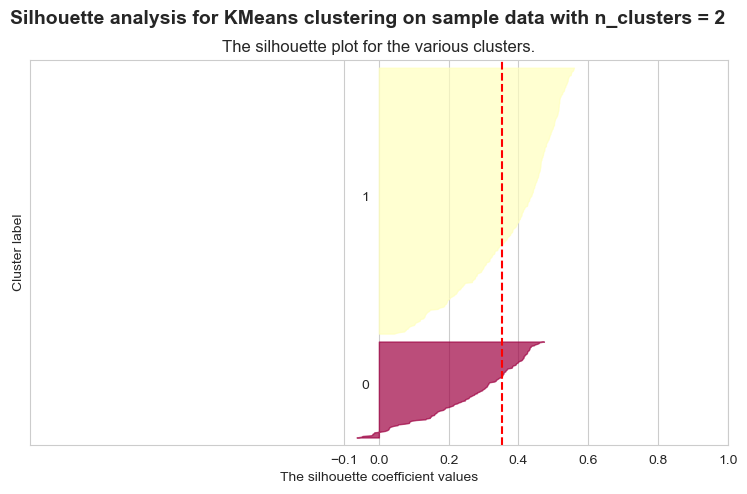

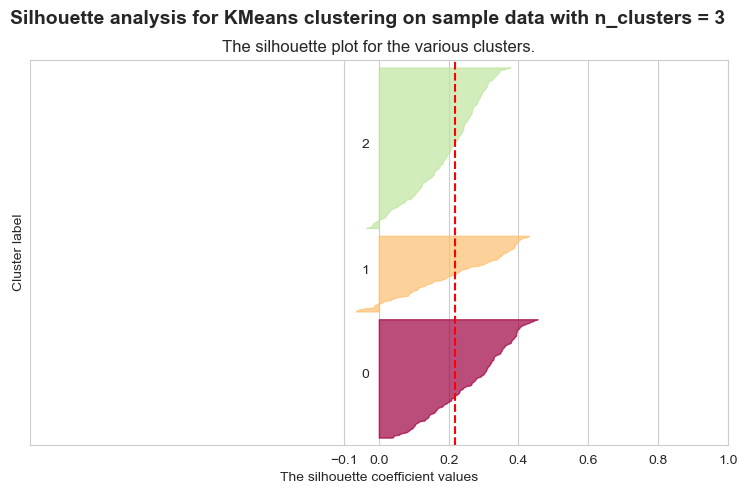

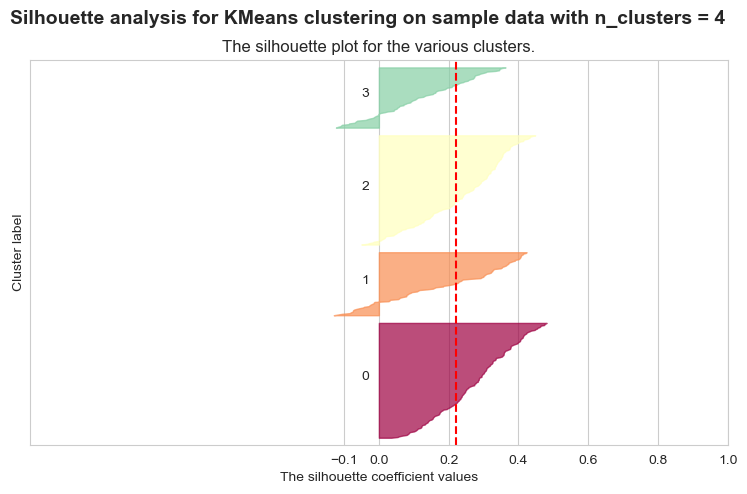

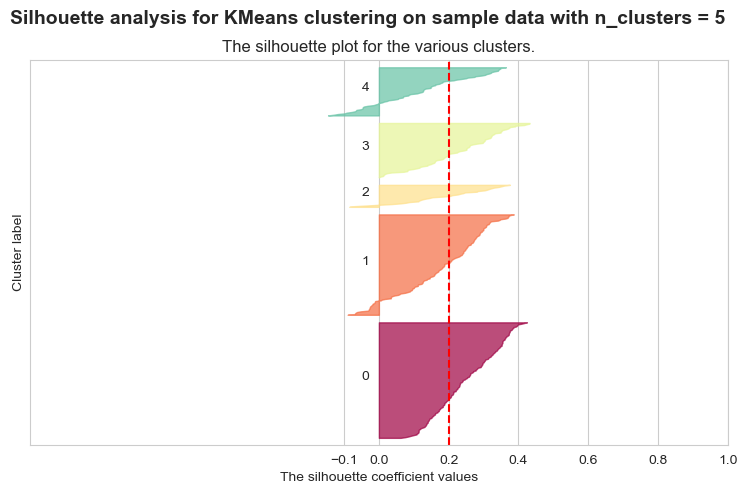

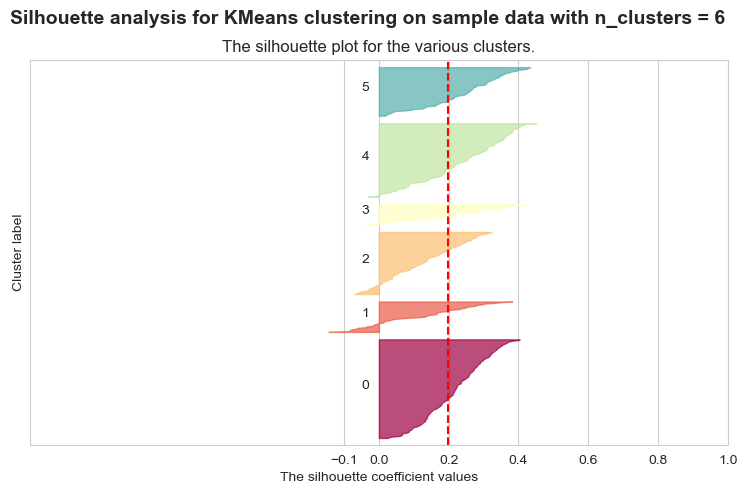

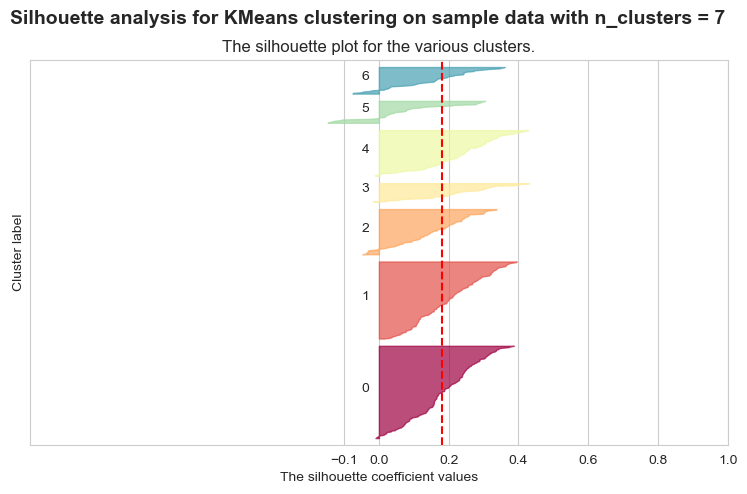

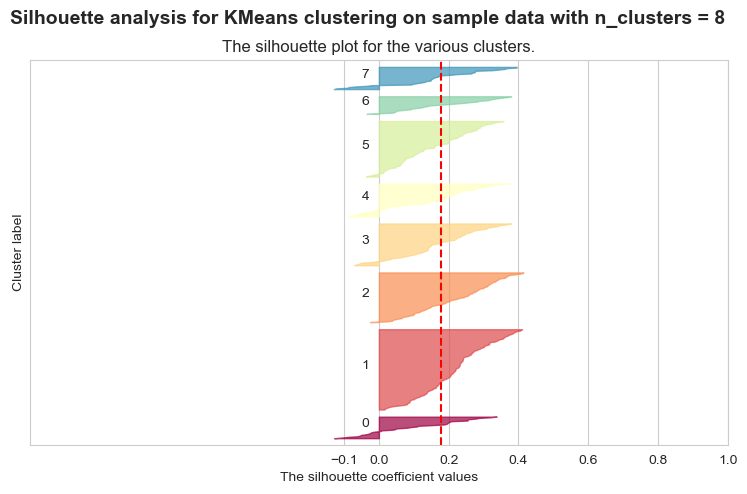

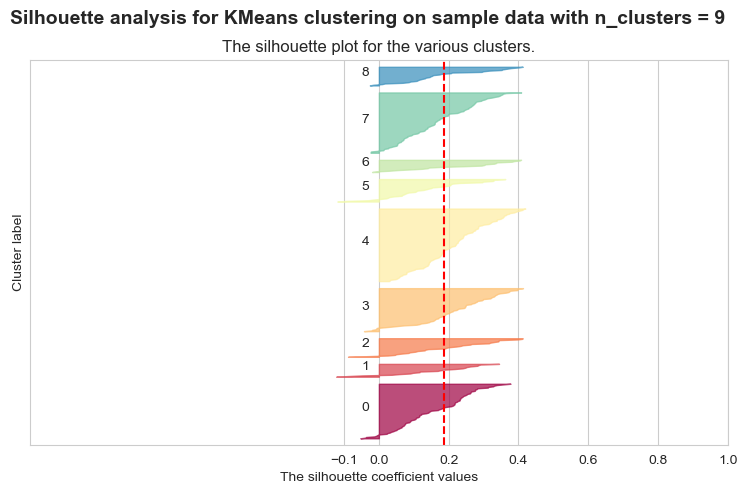

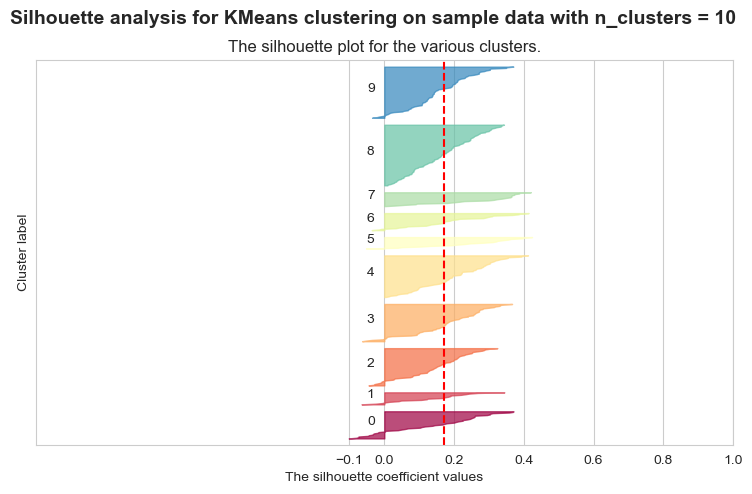

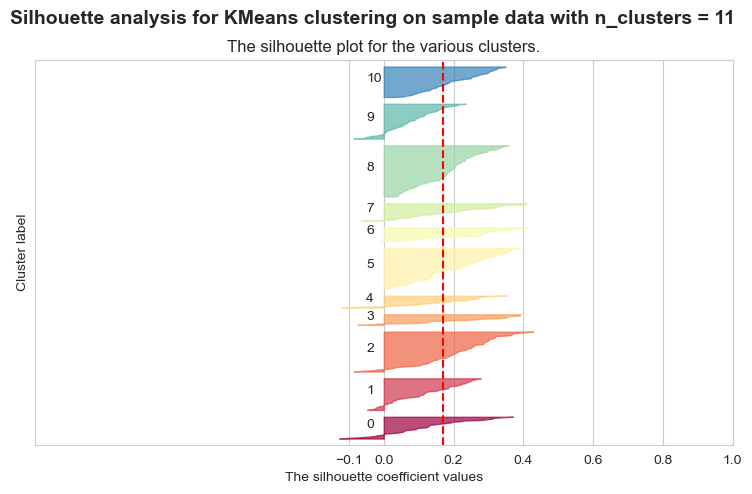

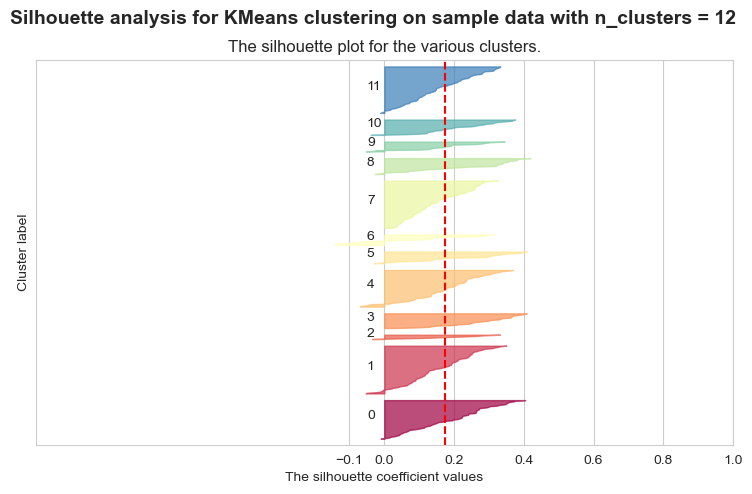

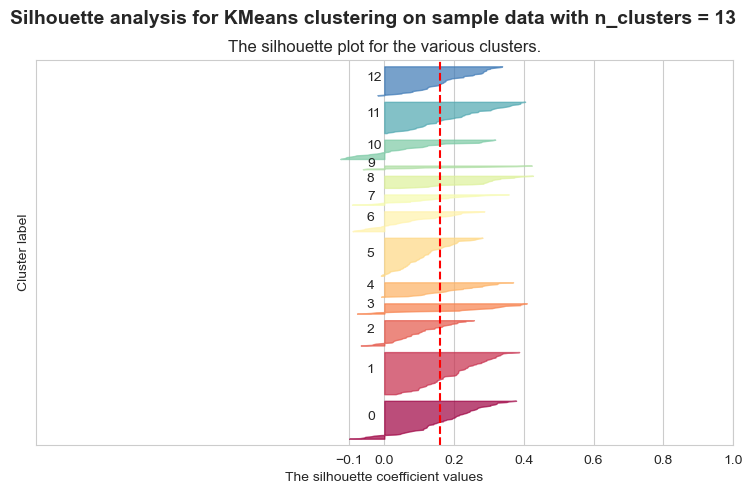

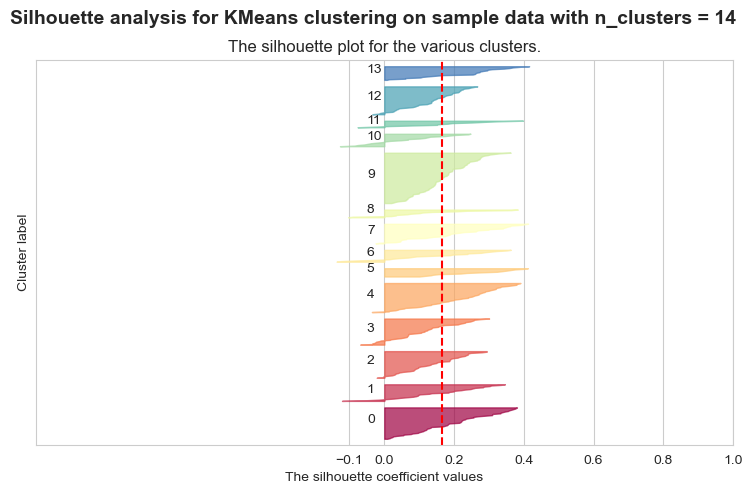

In [18]:
avg_silhouette_scores = []

for K in Krange:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (K + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 30 for reproducibility.
    clusterer = KMeans(n_clusters = K, random_state = 30)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg  = silhouette_score(X, cluster_labels)
    avg_silhouette_scores.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0] 
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting title, xlabel and ylabel 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % K),
                 fontsize=14, fontweight='bold')

Text(0, 0.5, 'Average Silhouette Score')

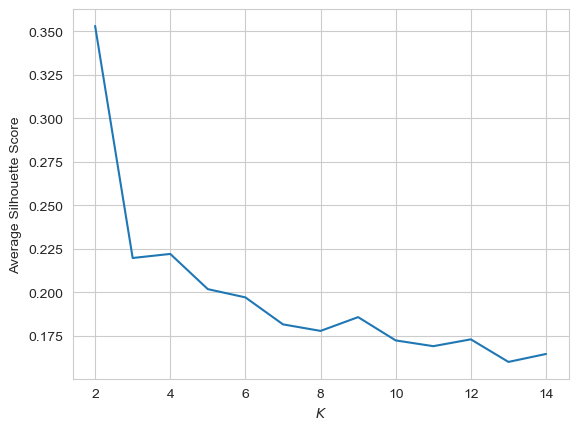

In [19]:
plt.plot(Krange, avg_silhouette_scores)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

Based on the Average Silhoueette Score plot of K, the K score seems to peak around K=4. 

In [20]:
# Kmeans Clustering
KC_labels = KMeans(n_clusters = 4, random_state = 30).fit_predict(X)

In [21]:
KC_labels

array([0, 3, 1, 2, 3, 0, 0, 3, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 3, 3,
       3, 1, 0, 3, 1, 2, 1, 1, 1, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 0, 1, 3,
       3, 3, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 3, 2, 0, 3, 2, 0, 1, 0, 1, 2,
       1, 0, 2, 2, 1, 3, 2, 2, 1, 3, 0, 2, 0, 2, 1, 3, 0, 0, 2, 3, 2, 1,
       0, 2, 2, 2, 2, 0, 2, 3, 0, 3, 0, 1, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 1, 0, 1, 1, 3, 0, 3, 1, 3, 3, 2, 0, 0, 1, 1, 0, 2, 2, 0, 3, 0,
       2, 0, 1, 1, 0, 0, 2, 1, 3, 2, 3, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0,
       3, 3, 0, 1, 2, 2, 2, 0, 1, 3, 1, 1, 2, 3, 2, 1, 0, 0, 1, 0, 3, 1,
       3, 3, 0, 2, 0, 2, 2, 0, 1, 0, 0, 1, 2, 3, 0, 0, 1, 1, 3, 2, 2, 3,
       0, 1, 2, 3, 1, 0, 2, 0, 2, 2, 0, 1, 0, 3, 2, 0, 0, 2, 3, 2, 0, 2,
       0, 0, 3, 2, 0, 1, 1, 0, 3, 1, 2, 1, 1, 2, 2, 2, 0, 2, 3, 1, 0, 0,
       1, 3, 3, 0, 2, 2, 0, 3, 0, 2, 0, 3, 2, 0, 0, 2, 2, 3, 0, 2, 0, 0,
       1, 0, 2, 2, 1, 2, 0, 2, 3, 1, 2, 1, 0, 0, 3, 0, 3, 0, 1, 2, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 3, 0, 2, 1, 2, 2,

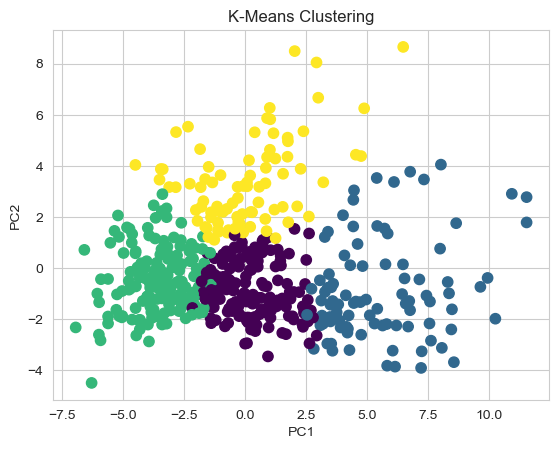

In [22]:
plt.scatter(X[:, 0], X[:, 1], c = KC_labels,
            s=55, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
_ = plt.title('K-Means Clustering')

In [23]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, KC_labels))

Silhouette Coefficient: 0.222


### Agglomerative Clustering

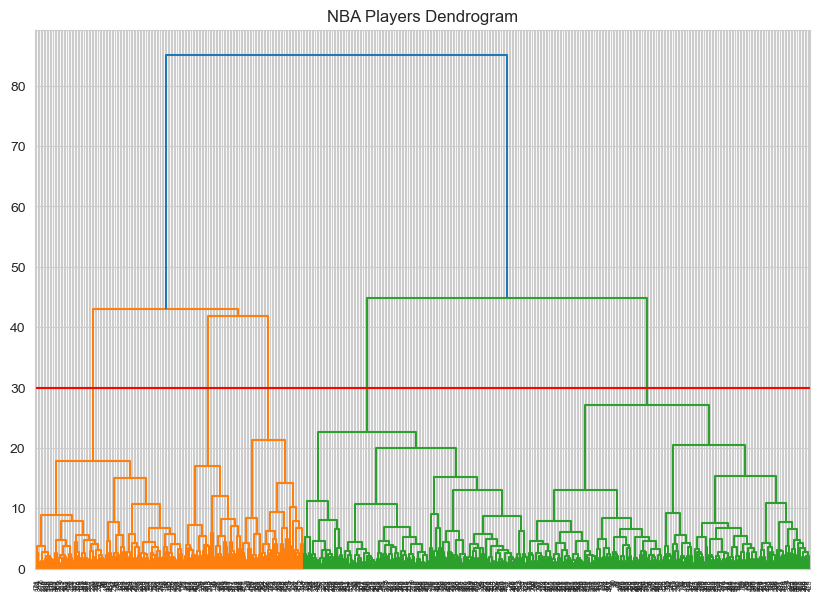

In [24]:
# Dendrogram
plt.figure(figsize=(10, 7))
plt.title("NBA Players Dendrogram")


cluster = linkage(X, method='ward', metric="euclidean")

dendrogram(cluster)

plt.axhline(y = 30, color = 'r', linestyle = '-')

To pick the optimal number of clusters, I identified the area in the chart with the highest vertical distance that does not interect with any clusters. The optimal number is 5. 

In [25]:
# Agglomerative Clustering with Ward Linkage
AC = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
AC.fit(X)
AC_labels = AC.labels_

In [26]:
AC_labels

array([0, 1, 1, 2, 0, 3, 3, 1, 2, 2, 0, 4, 0, 3, 3, 3, 2, 2, 2, 0, 1, 0,
       0, 4, 3, 1, 3, 2, 3, 1, 3, 3, 0, 0, 0, 2, 0, 4, 3, 0, 0, 3, 3, 0,
       0, 0, 0, 3, 2, 3, 3, 2, 2, 2, 4, 2, 0, 2, 0, 0, 2, 3, 1, 0, 3, 0,
       3, 0, 2, 0, 4, 0, 2, 2, 3, 0, 3, 2, 3, 2, 4, 0, 3, 2, 2, 1, 2, 1,
       3, 2, 2, 2, 0, 0, 2, 0, 3, 1, 0, 1, 0, 3, 0, 0, 2, 2, 0, 0, 0, 0,
       2, 4, 3, 4, 1, 0, 0, 0, 4, 0, 0, 2, 3, 3, 4, 3, 0, 2, 2, 3, 1, 3,
       2, 3, 4, 4, 0, 0, 0, 4, 0, 2, 0, 2, 0, 2, 2, 0, 2, 3, 4, 2, 0, 3,
       0, 1, 0, 4, 2, 0, 0, 0, 4, 0, 1, 4, 2, 1, 2, 1, 3, 3, 3, 0, 1, 3,
       0, 0, 0, 0, 0, 0, 2, 0, 3, 2, 3, 4, 0, 0, 0, 3, 3, 1, 0, 2, 2, 0,
       3, 3, 2, 0, 3, 3, 2, 0, 2, 2, 0, 3, 3, 0, 2, 1, 3, 2, 0, 2, 3, 2,
       3, 0, 0, 2, 0, 4, 4, 0, 0, 1, 2, 3, 4, 2, 2, 2, 3, 2, 0, 3, 2, 0,
       4, 0, 0, 0, 2, 2, 0, 0, 0, 2, 3, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 2, 2, 4, 2, 0, 2, 0, 3, 2, 4, 0, 0, 1, 0, 0, 3, 3, 2, 0, 2,
       2, 0, 3, 2, 3, 2, 0, 0, 2, 0, 0, 0, 3, 2, 2,

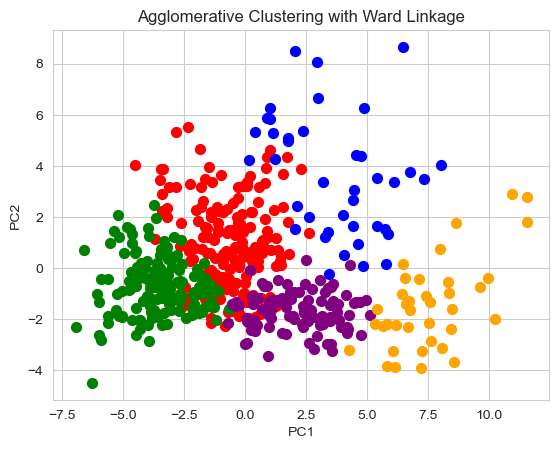

In [27]:
plt.scatter(X[AC_labels==0, 0], X[AC_labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[AC_labels==1, 0], X[AC_labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[AC_labels==2, 0], X[AC_labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[AC_labels==3, 0], X[AC_labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[AC_labels==4, 0], X[AC_labels==4, 1], s=50, marker='o', color='orange')

plt.xlabel('PC1')
plt.ylabel('PC2')
_ = plt.title('Agglomerative Clustering with Ward Linkage')
plt.show()

In [28]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, AC_labels))

Silhouette Coefficient: 0.184


### Analysis

In [29]:
# Add in cluster labels
nba_df['AC_Cluster'] = AC_labels
nba_df.head()

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AC_Cluster
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,C,73,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,0
Steven Adams,C,76,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,1
Bam Adebayo,C,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,1
Santi Aldama,PF,32,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2
LaMarcus Aldridge,C,47,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,0


In [30]:
nba_df['KC_Cluster'] = KC_labels
nba_df.head()

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AC_Cluster,KC_Cluster
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,C,73,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,0,0
Steven Adams,C,76,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,...,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,1,3
Bam Adebayo,C,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,...,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,1,1
Santi Aldama,PF,32,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,...,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2,2
LaMarcus Aldridge,C,47,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,...,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,0,3


In [31]:
nba_df.head(10)

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AC_Cluster,KC_Cluster
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,C,73,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,0,0
Steven Adams,C,76,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,...,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,1,3
Bam Adebayo,C,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,...,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,1,1
Santi Aldama,PF,32,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,...,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2,2
LaMarcus Aldridge,C,47,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,...,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,0,3
Nickeil Alexander-Walker,SG,65,22.6,3.9,10.5,0.372,1.6,5.2,0.311,2.3,...,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,3,0
Grayson Allen,SG,66,27.3,3.9,8.6,0.448,2.4,5.9,0.409,1.5,...,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1,3,0
Jarrett Allen,C,56,32.3,6.6,9.7,0.677,0.0,0.2,0.100,6.6,...,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1,1,3
Jose Alvarado,PG,54,15.4,2.4,5.4,0.446,0.6,2.0,0.291,1.8,...,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1,2,0


In [32]:
# Check AC Cluster Size
nba_df['AC_Cluster'].value_counts().sort_index()

0    182
1     40
2    145
3     96
4     37
Name: AC_Cluster, dtype: int64

Text(0, 0.5, 'Count')

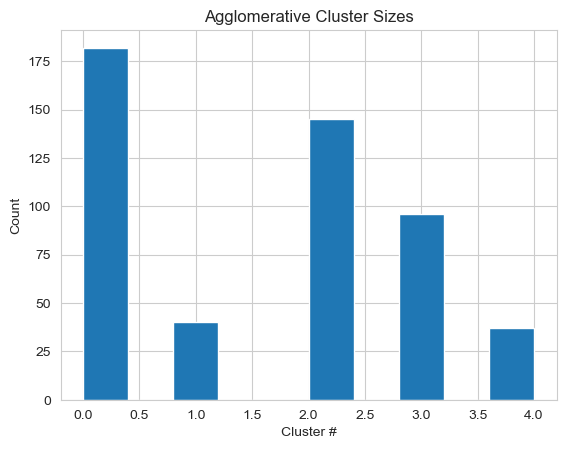

In [33]:
# Plot AC Cluster Distribution
plt.hist(nba_df['AC_Cluster'])
plt.title('Agglomerative Cluster Sizes')
plt.xlabel('Cluster #')
plt.ylabel('Count')

In [34]:
# Check KC Cluster Size
nba_df['KC_Cluster'].value_counts().sort_index()

0    165
1     91
2    157
3     87
Name: KC_Cluster, dtype: int64

Text(0, 0.5, 'Count')

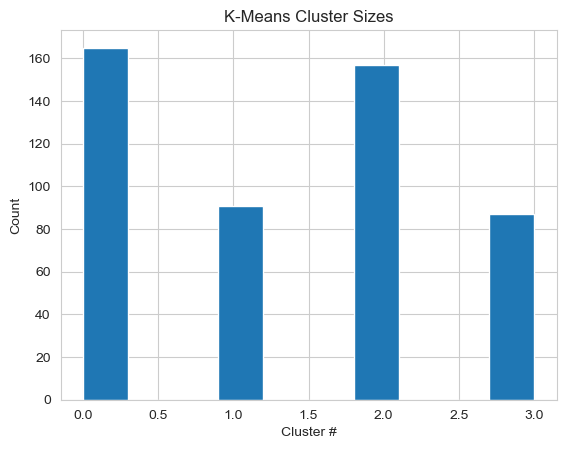

In [35]:
# Plot KC Cluster Distribution
plt.hist(nba_df['KC_Cluster'])
plt.title('K-Means Cluster Sizes')
plt.xlabel('Cluster #')
plt.ylabel('Count')

## Final Model Selection

The final model I decided to use for this project was the Agglomerative Clustering with Ward Linkage. While the K-Means Clustering had a better Silhouette Coefficient score of 0.222 (n_clusters = 4) compared to 0.184 for Agglomerative Clustering (n_clusters = 5), I chose to use the Agglomerative Clustering because it offered a more definitive selection for the optimal number of clusters and I felt that 4 clusters using K-Means were not enough for a pool of 500 players. 

In [36]:
# Drop KC_Cluster labels from df
nba_df = nba_df.drop(columns='KC_Cluster')

In [47]:
# First Agglomerative Cluster
AC0 = nba_df.loc[nba_df['AC_Cluster'] == 0]
AC0.head(60)

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AC_Cluster
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,C,73,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,0
LaMarcus Aldridge,C,47,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,0
Kyle Anderson,PF,69,21.5,3.0,6.8,0.446,0.5,1.6,0.330,2.5,...,1.0,4.3,5.3,2.7,1.1,0.7,1.0,1.6,7.6,0
Thanasis Antetokounmpo,SF,48,9.9,1.5,2.7,0.547,0.0,0.3,0.143,1.4,...,0.8,1.3,2.1,0.5,0.3,0.3,0.5,1.4,3.6,0
Deni Avdija,SF,82,24.2,3.0,7.1,0.432,1.0,3.2,0.317,2.0,...,0.6,4.5,5.2,2.0,0.7,0.5,1.1,2.3,8.4,0
Udoka Azubuike,C,17,11.5,2.2,2.9,0.755,0.0,0.0,0.000,2.2,...,1.1,3.1,4.2,0.0,0.1,0.6,0.7,1.5,4.7,0
Marvin Bagley III,PF,48,23.9,4.7,9.3,0.504,0.5,2.0,0.237,4.2,...,2.2,4.9,7.0,0.8,0.5,0.4,0.8,1.9,11.3,0
Charles Bassey,PF,23,7.3,1.3,2.0,0.638,0.0,0.2,0.000,1.3,...,1.0,1.7,2.7,0.3,0.2,0.7,0.3,1.4,3.0,0
Keita Bates-Diop,SF,59,16.2,2.3,4.5,0.517,0.3,0.9,0.309,2.0,...,1.1,2.9,3.9,0.7,0.5,0.2,0.8,1.0,5.7,0


In [38]:
# Second Agglomerative Cluster
AC1 = nba_df.loc[nba_df['AC_Cluster'] == 1]
AC1

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AC_Cluster
Player,,,,,,,,,,,,,,,,,,,,,
Steven Adams,C,76,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,1
Bam Adebayo,C,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,1
Jarrett Allen,C,56,32.3,6.6,9.7,0.677,0.0,0.2,0.100,6.6,...,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1,1
Deandre Ayton,C,58,29.5,7.6,12.0,0.634,0.1,0.3,0.368,7.5,...,2.6,7.7,10.2,1.4,0.7,0.7,1.6,2.4,17.2,1
Mo Bamba,C,71,25.7,4.2,8.7,0.480,1.5,4.0,0.381,2.7,...,2.1,6.0,8.1,1.2,0.5,1.7,1.1,2.6,10.6,1
Scottie Barnes,PF,74,35.4,6.2,12.6,0.492,0.8,2.6,0.301,5.4,...,2.6,4.9,7.5,3.5,1.1,0.7,1.8,2.6,15.3,1
Miles Bridges,PF,80,35.5,7.5,15.2,0.491,1.9,5.8,0.331,5.5,...,1.1,5.9,7.0,3.8,0.9,0.8,1.9,2.4,20.2,1
Clint Capela,C,74,27.6,5.0,8.2,0.613,0.0,0.0,0.000,5.0,...,3.8,8.1,11.9,1.2,0.7,1.3,0.6,2.2,11.1,1
Wendell Carter Jr.,C,62,29.9,5.8,11.0,0.525,1.1,3.5,0.327,4.7,...,2.2,8.2,10.5,2.8,0.6,0.7,1.9,2.7,15.0,1


In [49]:
# Third Agglomerative Cluster
AC2 = nba_df.loc[nba_df['AC_Cluster'] == 2]
AC2.head(50)

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AC_Cluster
Player,,,,,,,,,,,,,,,,,,,,,
Santi Aldama,PF,32,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2
Jose Alvarado,PG,54,15.4,2.4,5.4,0.446,0.6,2.0,0.291,1.8,...,0.5,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1,2
Justin Anderson,SF,16,19.8,2.3,5.9,0.379,0.9,3.7,0.254,1.3,...,0.3,2.6,2.9,2.1,0.5,0.4,0.5,1.4,6.4,2
Ryan Arcidiacono,PG,10,7.6,0.6,1.2,0.500,0.4,0.9,0.444,0.2,...,0.0,0.8,0.8,0.4,0.1,0.0,0.3,0.5,1.6,2
Trevor Ariza,SF,24,19.3,1.4,4.1,0.333,0.8,3.1,0.270,0.5,...,0.4,3.0,3.4,1.1,0.5,0.3,0.5,0.8,4.0,2
D.J. Augustin,PG,55,16.1,1.7,4.0,0.423,1.2,3.0,0.415,0.5,...,0.2,1.0,1.2,1.9,0.3,0.0,1.0,0.7,5.3,2
Dalano Banton,SF,64,10.9,1.3,3.2,0.411,0.2,0.8,0.255,1.1,...,0.6,1.3,1.9,1.5,0.4,0.2,0.8,1.1,3.2,2
Kent Bazemore,SF,39,14.0,1.2,3.6,0.324,0.7,2.1,0.363,0.4,...,0.3,1.4,1.8,0.9,0.6,0.2,0.5,1.8,3.4,2
Keljin Blevins,SF,31,11.3,1.1,3.6,0.306,0.7,2.3,0.292,0.4,...,0.5,0.9,1.5,0.6,0.4,0.0,0.5,0.9,3.1,2


In [50]:
# Fourth Agglomerative Cluster
AC3 = nba_df.loc[nba_df['AC_Cluster'] == 3]
AC3.head(40)

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AC_Cluster
Player,,,,,,,,,,,,,,,,,,,,,
Nickeil Alexander-Walker,SG,65,22.6,3.9,10.5,0.372,1.6,5.2,0.311,2.3,...,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,3
Grayson Allen,SG,66,27.3,3.9,8.6,0.448,2.4,5.9,0.409,1.5,...,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1,3
Carmelo Anthony,PF,69,26.0,4.6,10.5,0.441,2.2,5.8,0.375,2.5,...,0.9,3.3,4.2,1.0,0.7,0.8,0.9,2.4,13.3,3
Cole Anthony,PG,65,31.7,5.5,14.0,0.391,2.0,6.0,0.338,3.5,...,0.5,4.9,5.4,5.7,0.7,0.3,2.6,2.6,16.3,3
OG Anunoby,SF,48,36.0,6.4,14.5,0.443,2.4,6.6,0.363,4.0,...,1.5,4.0,5.5,2.6,1.5,0.5,1.7,2.7,17.1,3
Lonzo Ball,PG,35,34.6,4.6,10.9,0.423,3.1,7.4,0.423,1.5,...,1.0,4.4,5.4,5.1,1.8,0.9,2.3,2.4,13.0,3
Desmond Bane,SF,76,29.8,6.7,14.5,0.461,3.0,6.9,0.436,3.7,...,0.6,3.8,4.4,2.7,1.2,0.4,1.5,2.6,18.2,3
Harrison Barnes,PF,77,33.6,5.1,10.8,0.469,1.8,4.7,0.394,3.2,...,1.1,4.5,5.6,2.4,0.7,0.2,1.5,1.2,16.4,3
RJ Barrett,SF,70,34.5,7.0,17.1,0.408,2.0,5.8,0.342,5.0,...,0.9,4.9,5.8,3.0,0.6,0.2,2.2,2.0,20.0,3


In [41]:
# Fifth Agglomerative Cluster
AC4 = nba_df.loc[nba_df['AC_Cluster'] == 4]
AC4

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AC_Cluster
Player,,,,,,,,,,,,,,,,,,,,,
Giannis Antetokounmpo,PF,67,32.9,10.3,18.6,0.553,1.1,3.6,0.293,9.2,...,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9,4
LaMelo Ball,PG,75,32.3,7.2,16.7,0.429,2.9,7.5,0.389,4.2,...,1.4,5.2,6.7,7.6,1.6,0.4,3.3,3.2,20.1,4
Bradley Beal,SG,40,36.0,8.7,19.3,0.451,1.6,5.3,0.300,7.1,...,1.0,3.8,4.7,6.6,0.9,0.4,3.4,2.4,23.2,4
Devin Booker,SG,68,34.5,9.7,20.9,0.466,2.7,7.0,0.383,7.0,...,0.7,4.4,5.0,4.8,1.1,0.4,2.4,2.6,26.8,4
Jaylen Brown,SF,66,33.6,8.7,18.4,0.473,2.5,7.0,0.358,6.2,...,0.8,5.3,6.1,3.5,1.1,0.3,2.7,2.5,23.6,4
Jimmy Butler,SF,57,33.9,7.0,14.5,0.480,0.5,2.0,0.233,6.5,...,1.8,4.1,5.9,5.5,1.6,0.5,2.1,1.5,21.4,4
Cade Cunningham,PG,64,32.6,6.7,16.1,0.416,1.8,5.7,0.314,4.9,...,0.9,4.6,5.5,5.6,1.2,0.7,3.7,3.1,17.4,4
Stephen Curry,PG,64,34.5,8.4,19.1,0.437,4.5,11.7,0.380,3.9,...,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5,4
DeMar DeRozan,PF,76,36.1,10.2,20.2,0.504,0.7,1.9,0.352,9.5,...,0.7,4.4,5.2,4.9,0.9,0.3,2.4,2.3,27.9,4


### Aggegrate by Cluster to Show Cluster Level Stats

In [42]:
# Aggegrate Clusters by mean
cluster_summary = nba_df.groupby(['AC_Cluster']).mean()
cluster_summary = cluster_summary.reset_index(drop=False)
cluster_summary_T = cluster_summary.T[1:]
cluster_summary_T = cluster_summary_T.rename(columns={0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4'})
cluster_summary_T

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
G,54.181319,64.675000,34.475862,61.104167,62.702703
MP,19.410440,28.602500,11.505517,29.001042,34.824324
FG,2.826923,5.262500,1.388276,4.988542,8.575676
FGA,5.903846,9.717500,3.475862,11.529167,18.435135
FG%,0.490962,0.562225,0.398566,0.431219,0.464027
3P,0.796154,0.642500,0.517241,1.994792,2.259459
3PA,2.283516,1.970000,1.635172,5.442708,6.345946
3P%,0.305489,0.216625,0.301559,0.358802,0.348189
2P,2.033516,4.612500,0.873103,2.994792,6.316216
2PA,3.619780,7.745000,1.843448,6.087500,12.089189


In [43]:
lst = ['G', 'MP', 'PTS', 
       'AST', 'STL', 'BLK', 
       'FG', 'FGA', 'FG%', 
       '3P', '3PA', '3P%', 
       '2P', '2PA', '2P%', 
       'FT', 'FTA', 'FT%', 
       'ORB', 'DRB', 'TRB', 
       'TOV', 'PF', 'eFG%']

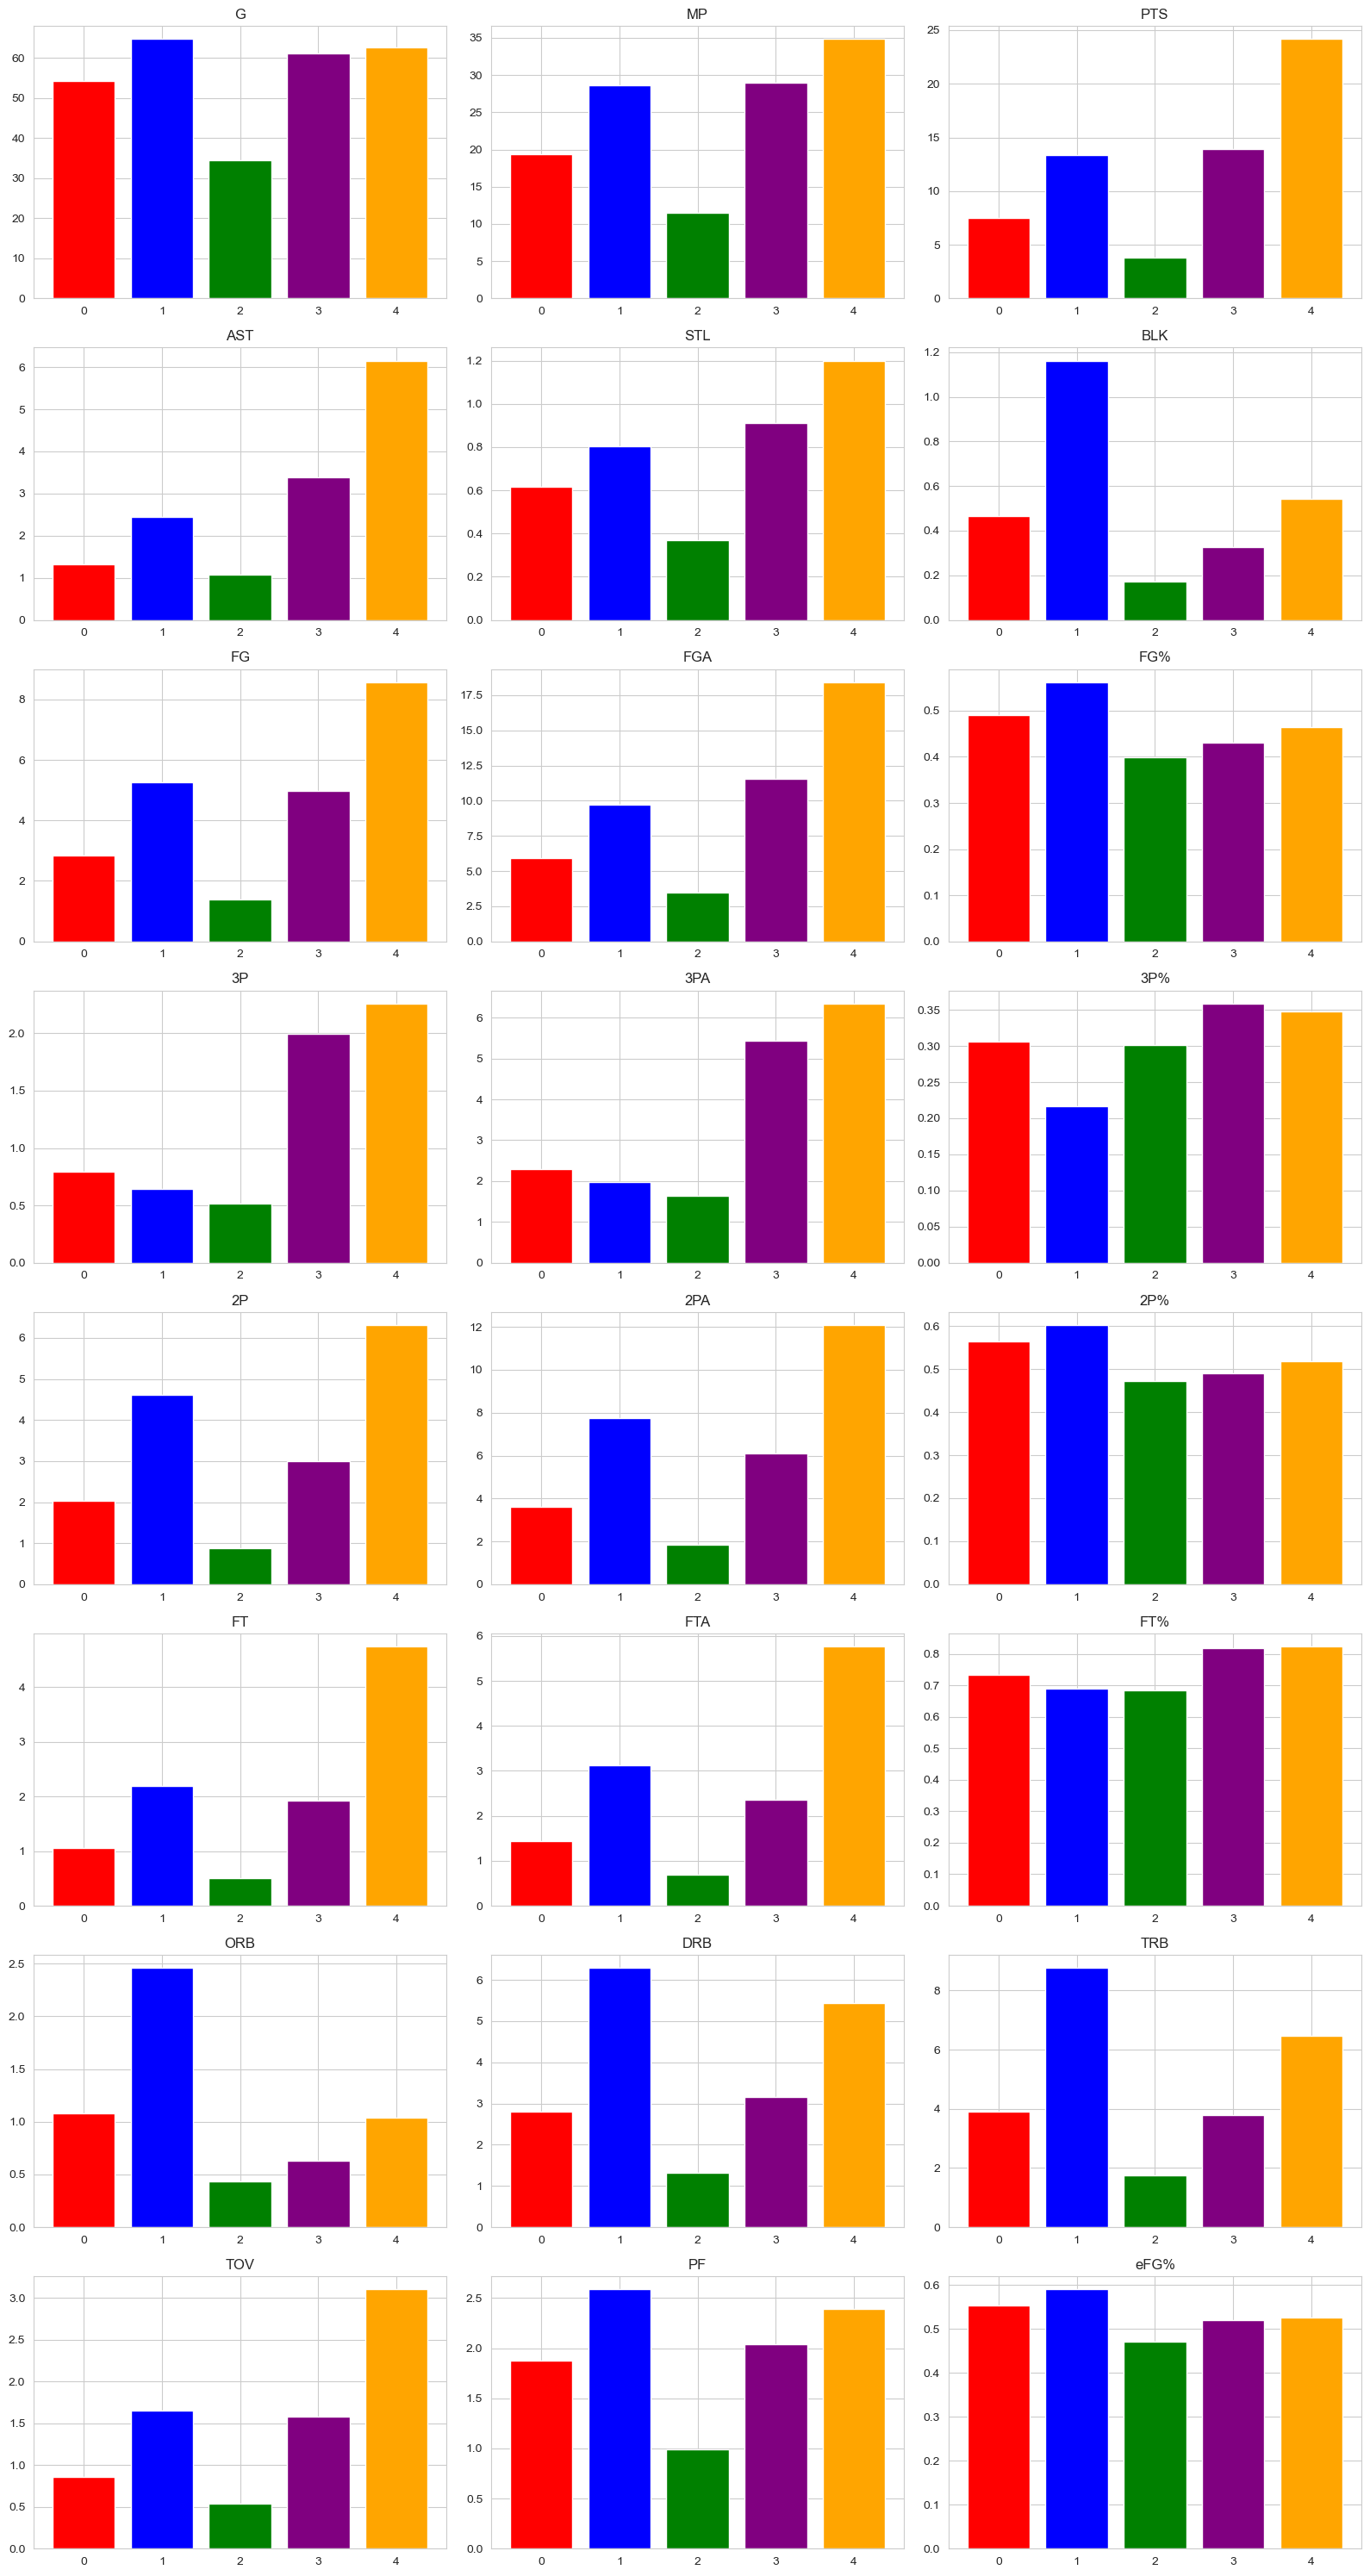

In [44]:
# Visualize Clusters using bar charts
fig, axs = plt.subplots(8, 3, sharey=False, tight_layout=True, figsize=(16,30))
coln=0

for i in range(0,8):
    for j in range(0,3):
        col=lst[coln]
        coln=coln+1
        axs[i,j].bar(cluster_summary['AC_Cluster'], height=cluster_summary[col], color = ['red', 'blue', 'green', 'purple', 'orange'])
        axs[i,j].set(title=col)
        axs[i,j].set_xticks(ticks=(0,1,2, 3, 4), minor=False)
plt.show()

## Conclusion

To start the modeling process I first applied a Principal Component Analysis on the data as a means for dimensionality reduction for more efficient analysis. I narrowed it down to the first 10 PCA components because they account for about 95 of the variance of the data. 

The first unsupervised learning model I applied was K-Means Clustering. In order to identify the optimal number of K to choose for my model, I first used the Elbow Method. Based on the elbow method, I chose K=6, but there was no clear point at which K started to descend more slowly. I then attempted to determine the best K using the Silhouette Method. Using the Silhouette Method, the optimal number of K was K=4, with an average silhouette score of 0.222. I then applied the K-Means Clustering Model with K=4 and made a scatterplot to visualize the clusters. 

The next unsupervised learning model I applied was the Agglomerative Hierarchical Clustering with Ward linkage. I first determine the optimal number of clusters using a dendrogram. The optimal number of clusters was 5, which I determined by identifying the area in the chart with the highest vertical distance that does not intersect with any clusters. I then applied the Agglomerative Clustering method to the data and made a scatterplot to visualize the clusters.

For the final model selection for this project, I decided to use the Agglomerative Clustering with Ward Linkage. While the K-Means Clustering had a higher Silhouette Coefficient score of 0.222 (n_clusters = 4) compared to 0.184 for Agglomerative Clustering (n_clusters = 5), I chose to use the Agglomerative Clustering because it offered a clearer selection for the optimal number of clusters at K=5 and I also felt that 4 clusters were not enough to differentiate a pool of 500 players. 

Lastly, I aggregated the clusters in order to calculate cluster-level statistics and visualize how each cluster differ between each feature.

**Clusters**

***Cluster 0: Consistent Role Players***
- Mid- in most categories
- Highest count with 182 players

***Cluster 1: Traditional Big Men***
- High TRB, BLK, FG%
- Low 3P%, FT%

***Cluster 2: Fringe Bench Players***
- Low G, MP
- Lowest in most categories
- Second highest count with 145 players

***Cluster 3: Shooter / Defenders ("3- and D- Players")***
- High PTS, 3P, 3P%, FT%
- High STL, BLK

***Cluster 4: Versatile All-Around Players ("All-Stars')***
- High in most categories including MP, PTS, AST, STL, FTA, TOV
- Lowest count with only 37 players